## Basic Setup

In [1]:
%pwd

u'/home/ubuntu/myfastai/nbs'

In [2]:
import os, sys
current_dir = os.getcwd()
LESSION_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data/dogscats'

In [3]:
%matplotlib inline

Define path to data

In [4]:
#path = "data/dogscats"
path = "data/dogscats/sample/"

A few basic libraries required for initail exercise

In [5]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

load convinence function in util.py

In [6]:
import utils; reload(utils)
from utils import plots

Using Theano backend.


In [7]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

Famed 7 lines of code

In [8]:
%cd $DATA_HOME_DIR

path = DATA_HOME_DIR + '/sample/'
test_path = DATA_HOME_DIR + '/test/'
results_path = DATA_HOME_DIR + '/results/'
train_path = path + 'train/'
valid_path = path + 'valid/'

/home/ubuntu/myfastai/nbs/data/dogscats


In [9]:
batch_size=64
no_of_epochs=1

In [10]:
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
vgg.finetune(batches)

vgg.model.optimizer.lr = 0.01

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
latest_weights_filename = None
for epoch in range(no_of_epochs):
    #print "Running epoch: %s".format(epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
#print "Completed %s fit operations" % no_of_epochs

Epoch 1/1
160/160 [==============================] - 52s - loss: 0.9118 - acc: 0.7750 - val_loss: 0.0033 - val_acc: 1.0000


## Generate Predections

In [12]:
batches, preds = vgg.test(test_path, batch_size=batch_size*2)

Found 90 images belonging to 1 classes.


In [14]:
from utils import *

In [17]:
filenames = batches.filenames
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

In [85]:
isdog = preds[:,1]
print("Raw Predections: " + str(isdog[:5]))
print("Mid Predections: " + str(isdog[(isdog < .6) & (isdog > .4)]))
print("Edge Predections: " + str(isdog[(isdog == 1 | (isdog == 0))]))

Raw Predections: [  1.0745e-13   1.0000e+00   9.9981e-01   1.2581e-10   1.1006e-14]
Mid Predections: []
Edge Predections: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [86]:
isdog = isdog.clip(min=0.05, max=0.95)

In [89]:
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [91]:
subm = np.stack([ids, isdog], axis=1)
subm[:5]

array([[  6.1000e+01,   5.0000e-02],
       [  4.3000e+01,   9.5000e-01],
       [  3.2000e+01,   9.5000e-01],
       [  5.3000e+01,   5.0000e-02],
       [  6.0000e+01,   5.0000e-02]])

In [92]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/myfastai/nbs/data/dogscats


In [97]:
from IPython.display import FileLink
FileLink(DATA_HOME_DIR+'/'+submission_file_name)

/home/ubuntu/myfastai/nbs/data/dogscats/submission1.csv

In [22]:
filenames[:5]

['unknown/61.jpg',
 'unknown/43.jpg',
 'unknown/32.jpg',
 'unknown/53.jpg',
 'unknown/60.jpg']

In [23]:
from PIL import Image

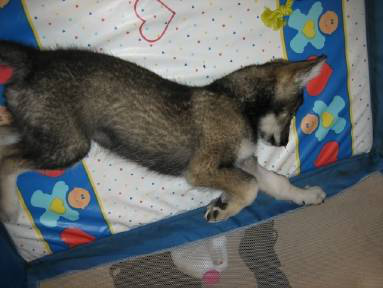

In [24]:
Image.open(test_path + filenames[2])

In [25]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [26]:
val_batches, probs = vgg.test(valid_path, batch_size=batch_size)

Found 40 images belonging to 2 classes.


In [34]:
filenames = val_batches.filenames
expected_labes = val_batches.classes

our_predections = probs[:,0]
our_lables = np.round(1 - our_predections)

In [61]:
from keras.preprocessing import image

def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)

n_view = 4

Found 40 correct lables


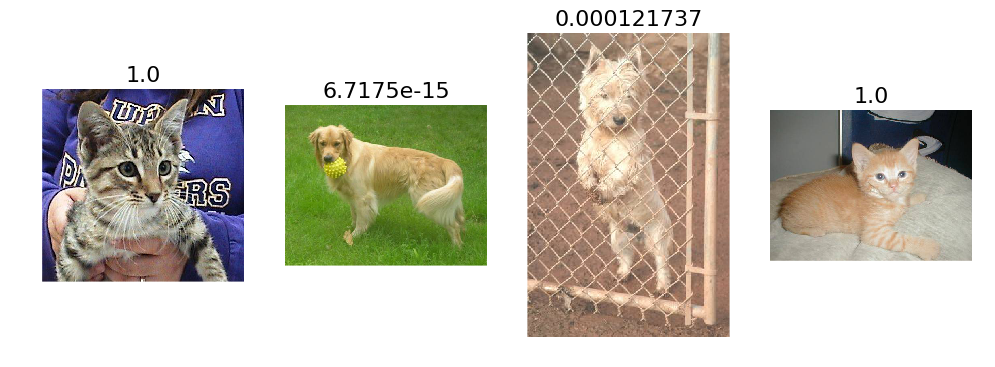

In [65]:
# A few random correct labels
correct = np.where(our_lables == expected_labes)[0]
print("Found %s correct lables" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predections[idx])

In [70]:
# A few incorrect lables
incorrect = np.where(our_lables != expected_labes)[0]
#print("Found %s correct lables" % len(incorrect))
#idx = permutation(incorrect)[:n_view]
#plots_idx(idx, our_predections[idx])

Found 20 correct cats lables


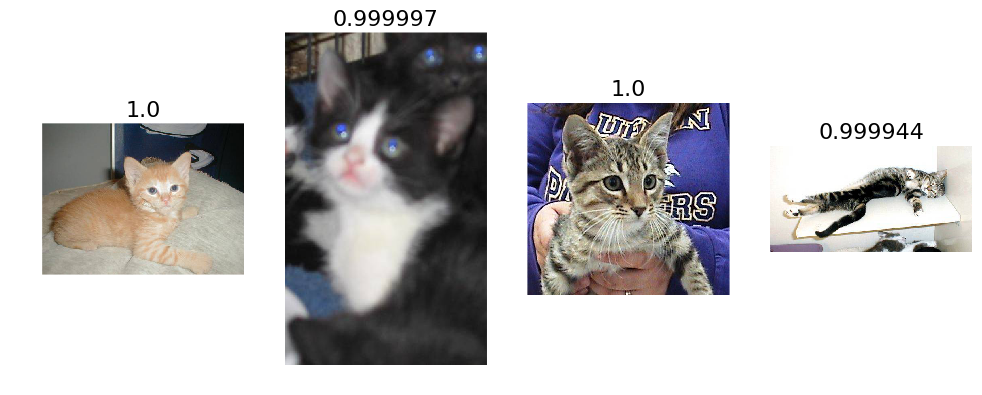

In [72]:
# A few random correct labels
correct_cats = np.where((our_lables == 0) & (our_lables == expected_labes))[0]
print("Found %s correct cats lables" % len(correct_cats))
idx = permutation(correct_cats)[:n_view]
plots_idx(idx, our_predections[idx])

Found 20 correct dogs lables


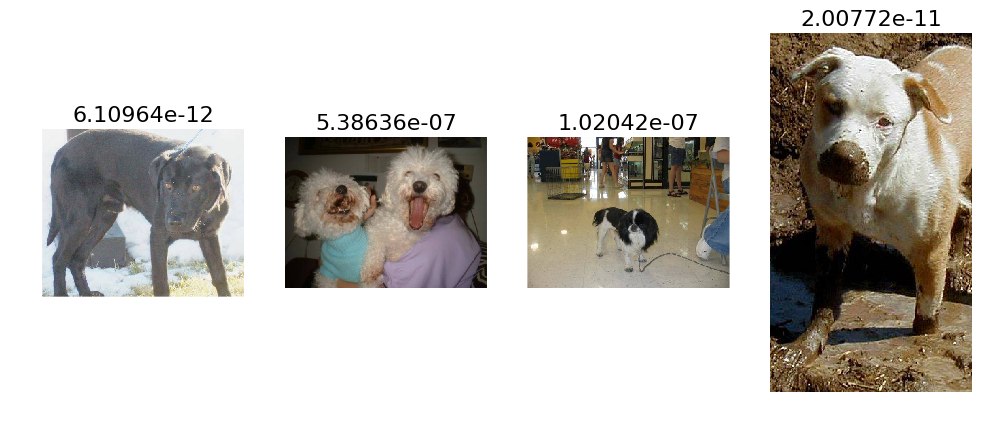

In [74]:
# A few random correct labels
correct_dogs = np.where((our_lables == 1) & (our_lables == expected_labes))[0]
print("Found %s correct dogs lables" % len(correct_dogs))
idx = permutation(correct_dogs)[:n_view]
plots_idx(idx, our_predections[idx])

In [77]:
incorrect_cats = np.where((our_lables==0) & (our_lables!=expected_labes))[0]
print('Found %d incorrect cats' % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predections[incorrect_cats])[::-1][:n_view]
    plot_idx(incorrect_cats[most_incorrect_cats], our_predections[incorrect_cats][most_incorrect_cats])

Found 0 incorrect cats


In [78]:
incorrect_dogs = np.where((our_lables==1) & (our_lables!=expected_labes))[0]
print('Found %d incorrect dogs' % len(incorrect_dogs))
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predections[incorrect_dogs])[::-1][:n_view]
    plot_idx(incorrect_dogs[most_incorrect_dogs], our_predections[incorrect_dogs][most_incorrect_dogs])

Found 0 incorrect dogs


In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labes, our_lables)

[[20  0]
 [ 0 20]]


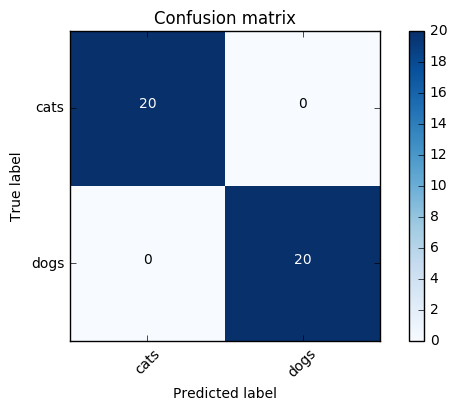

In [82]:
plot_confusion_matrix(cm, val_batches.class_indices)